In [2]:
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import KernelPCA
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
lfw_people = fetch_lfw_people(min_faces_per_person=20, resize=0.4)

In [5]:
n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)
print("Image shape: (%d, %d)" % (h, w))

Total dataset size:
n_samples: 3023
n_features: 1850
n_classes: 62
Image shape: (50, 37)


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [8]:
param_grid = {
    'kpca__n_components': [150],
    'kpca__kernel': ['poly', 'rbf', 'linear'],
    'kpca__gamma': [0.1]
}

In [9]:
pipeline = Pipeline([
    ('kpca', KernelPCA(fit_inverse_transform=True, random_state=42)),
    ('svm', SVC(kernel='linear', C=1))
])

In [10]:
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=2)

In [11]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca',
                                        KernelPCA(fit_inverse_transform=True,
                                                  random_state=42)),
                                       ('svm', SVC(C=1, kernel='linear'))]),
             n_jobs=2,
             param_grid={'kpca__gamma': [0.1],
                         'kpca__kernel': ['poly', 'rbf', 'linear'],
                         'kpca__n_components': [150]})

In [12]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'kpca__gamma': 0.1, 'kpca__kernel': 'linear', 'kpca__n_components': 150}
Best cross-validation score: 0.551480878426562


In [13]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [14]:
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy on test set: 0.6039603960396039
              precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.40      0.67      0.50         3
           2       1.00      0.67      0.80         3
           3       0.20      0.25      0.22         4
           4       0.00      0.00      0.00         2
           5       0.40      0.33      0.36         6
           6       1.00      0.17      0.29         6
           7       0.67      0.67      0.67         3
           8       0.60      0.60      0.60         5
           9       0.75      1.00      0.86         3
          10       0.79      0.75      0.77        36
          11       0.25      0.50      0.33         2
          12       0.73      0.73      0.73        15
          13       1.00      1.00      1.00         3
          14       0.66      0.87      0.75        45
          15       0.38      0.62      0.48         8
          16       1.00      0.75      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [17]:
def show_misclassified_images(X_test, y_test, y_pred, target_names, image_shape=(50, 37), num_images_to_show=10):
    misclassified_indices = np.where(y_test != y_pred)[0]

    misclassified_images = X_test[misclassified_indices]
    misclassified_true_labels = y_test[misclassified_indices]
    misclassified_pred_labels = y_pred[misclassified_indices]

    num_misclassified = len(misclassified_indices)
    print(f'Total misclassified images: {num_misclassified}')

    num_images_to_display = min(num_misclassified, num_images_to_show)

    fig, axes = plt.subplots(2, num_images_to_display // 2, figsize=(12, 6))
    fig.subplots_adjust(wspace=0.4, hspace=0.4)

    for i, ax in enumerate(axes.flat):
        ax.imshow(misclassified_images[i].reshape(image_shape), cmap='gray')
        true_label_name = target_names[misclassified_true_labels[i]]
        pred_label_name = target_names[misclassified_pred_labels[i]]
        ax.set_title(f'True: {true_label_name}\nPredicted: {pred_label_name}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

Total misclassified images: 120


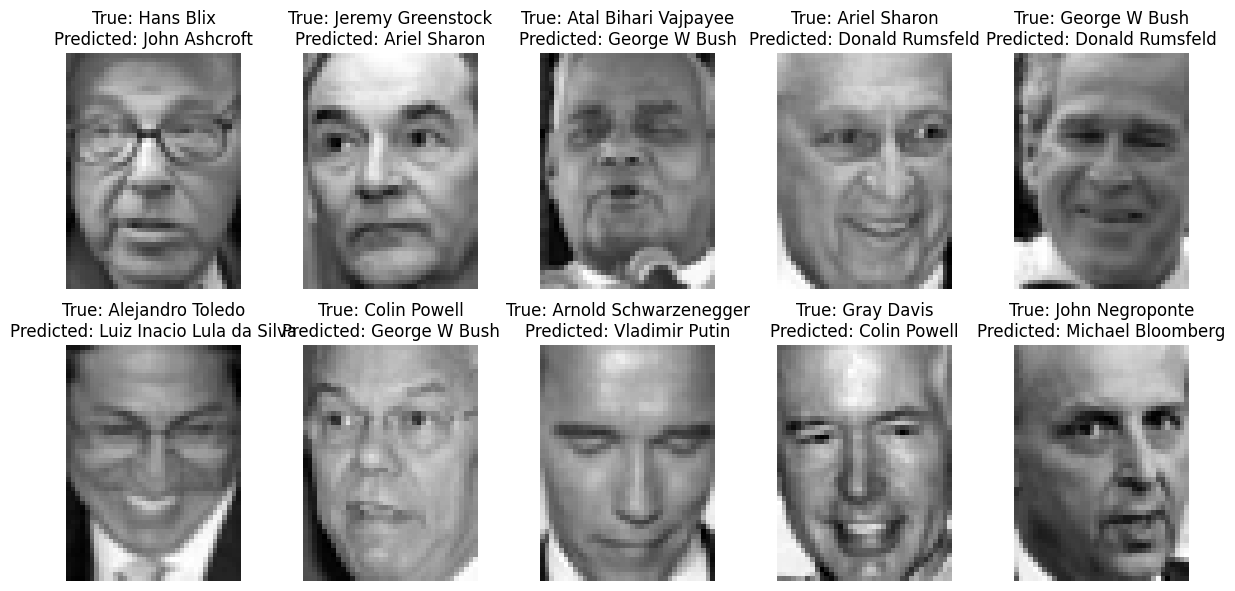

In [18]:
show_misclassified_images(X_test, y_test, y_pred, target_names)